In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*- #

# ------------------------------------------------------------------------------
#
#   Copyright (C) 2022 Concordia NAVlab. All rights reserved.
#
#   @Filename: draw_depth_estimation_res.py
#
#   @Author: Shun Li
#
#   @Date: 2022-01-13
#
#   @Email: 2015097272@qq.com
#
#   @Description:
#
# ------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D

In [2]:
depth_whole = pd.read_csv("/home/ls/m300_depth_filter/m300_depth_data/m300_grabbed_data_1_51.2/depth_estimation.csv")
depth_whole

,index,x,y,z,Unnamed: 4
0,15,4.945930,-0.725369,35.415230,NaN
1,15,5.875601,-0.849311,41.499283,NaN
2,15,6.504593,-0.953331,47.731361,NaN
3,15,4.999520,-0.700111,35.433155,NaN
4,15,5.720377,-0.800034,41.534985,NaN
...,...,...,...,...,...
141,34,6.380990,-0.945102,45.691998,NaN
142,47,6.381039,-0.958359,45.694214,NaN
143,55,6.418686,-0.728573,45.332489,NaN
144,58,6.490271,-0.732807,45.684284,NaN


In [3]:
x = depth_whole["x"].to_numpy()
y = depth_whole["y"].to_numpy()
z = depth_whole["z"].to_numpy()
index = depth_whole["index"].to_numpy()

# cond = z < 40
# x = x[cond]
# y = y[cond]
# z = z[cond]
# index = index[cond]


In [4]:
font1 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 16,
}

In [5]:
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

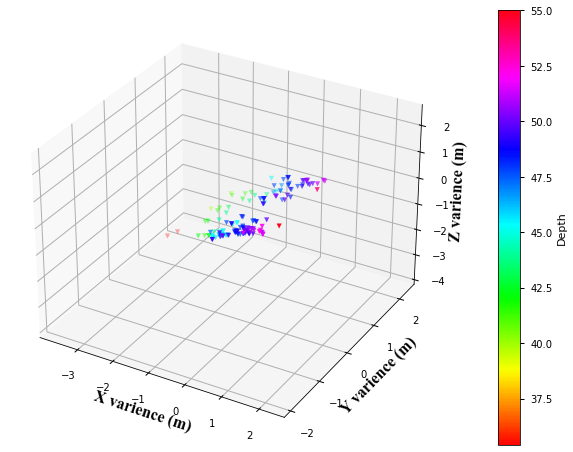

In [6]:
style.use('seaborn-notebook')

fig = plt.figure(figsize=[20,8])
ax = fig.gca(projection='3d')

p2 = ax.scatter3D(standardization(x), standardization(y), standardization(z), marker = "v", c=z, cmap="hsv")

ax.set_xlabel('X varience (m)', font=font1) # 画出坐标轴
ax.set_ylabel('Y varience (m)', font=font1)
ax.set_zlabel('Z varience (m)', font=font1)
fig.colorbar(p2,label="Depth")

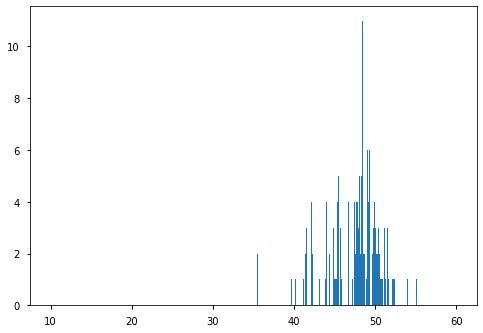

In [10]:
style.use('seaborn-notebook')
n, bins_limits, patches = plt.hist(z, bins=400,range=[10, 60])

In [11]:
max_index = np.argmax(n)
max_index

307

In [12]:
print(bins_limits[max_index])

48.375
